Your task is to explore the IMDB Movie Dataset, which includes columns like Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Stars, No_of_votes, and Gross.

Load and Inspect Data:

Use pandas to load the IMDB Movie Dataset.
Inspect the data to understand its structure and contents.
Data Preprocessing:

Handle missing values and convert data types as needed.
Rating Trends Over Years:

Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.
Genre Popularity Analysis:

Generate a Seaborn bar plot to compare the number of movies across different genres.
Director’s Impact on Ratings:

Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.
Star Power Analysis:

Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.
Box Plot of Genres vs. Ratings:

Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.
Correlation Heatmap:

Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.

In [4]:
import pandas as pd
df = pd.read_csv('imdb_top_1000.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [7]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df['Certificate'].fillna('No information', inplace=True)
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)
df['Gross'].fillna(df['Gross'].mean(), inplace=True)

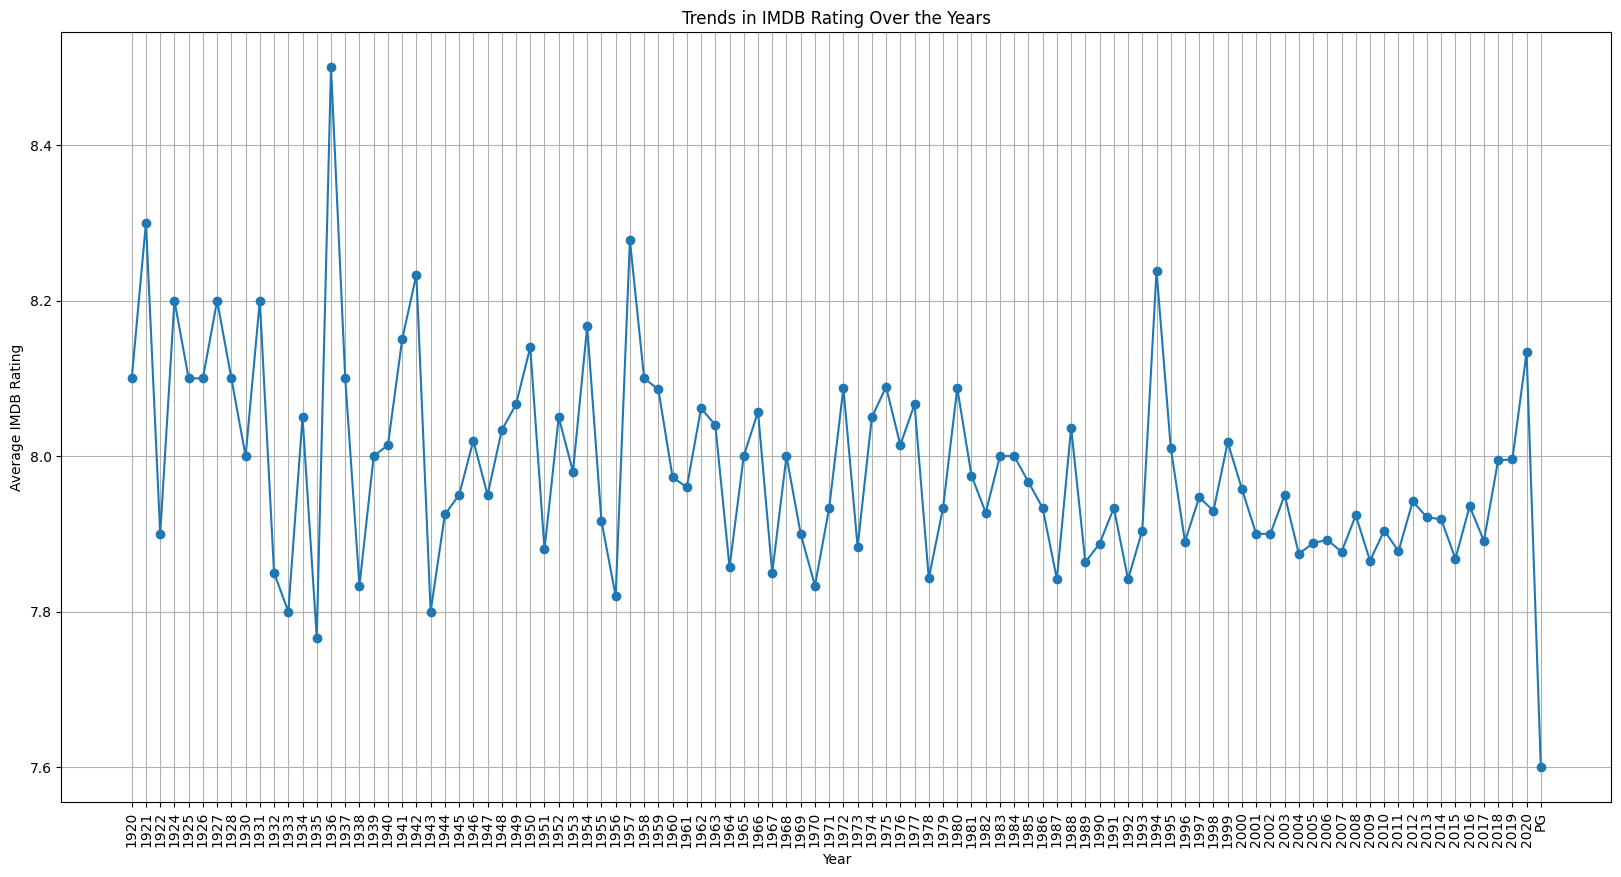

In [12]:
import matplotlib.pyplot as plt
rating_trends = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()
# separate it to 5 years
plt.figure(figsize=(20, 10))
plt.plot(rating_trends['Released_Year'], rating_trends['IMDB_Rating'], marker='o')
plt.title('Trends in IMDB Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/var/folders/8h/hbj9kb412sz4vmszf826vrrc0000gn/T/ipykernel_26244/1118933651.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


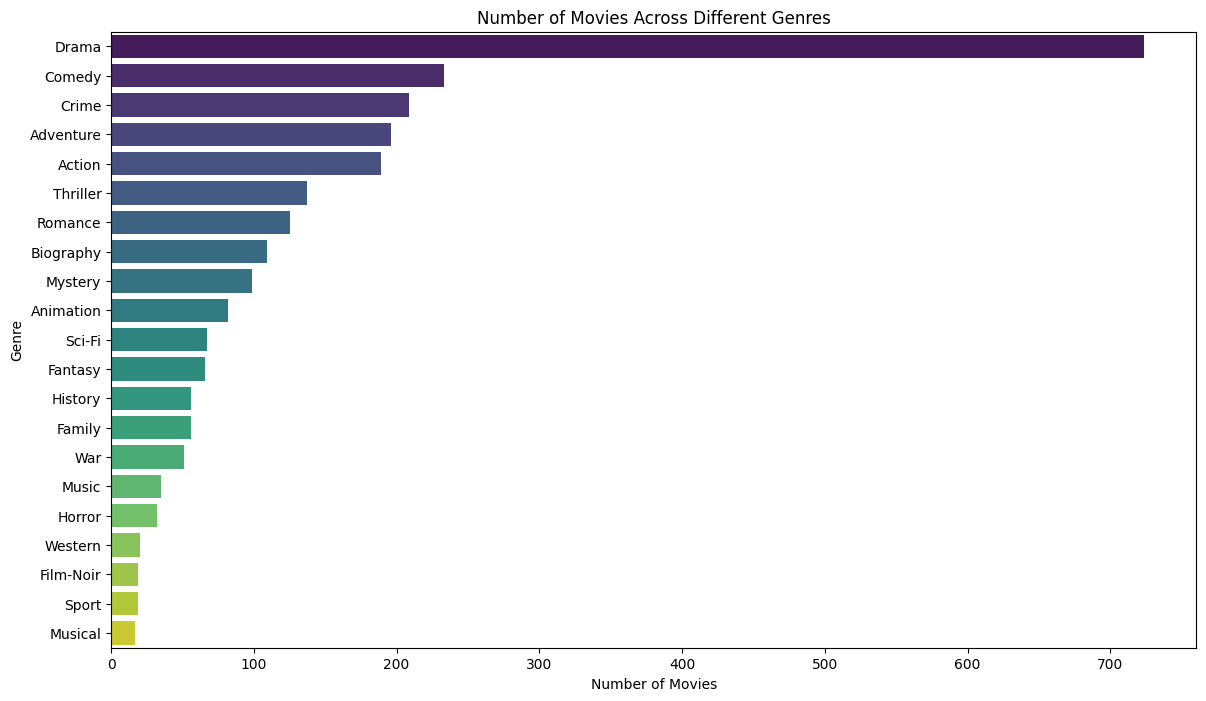

In [13]:
import seaborn as sns

# Explode the Genre column
genres = df['Genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre_counts = genres.value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies Across Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


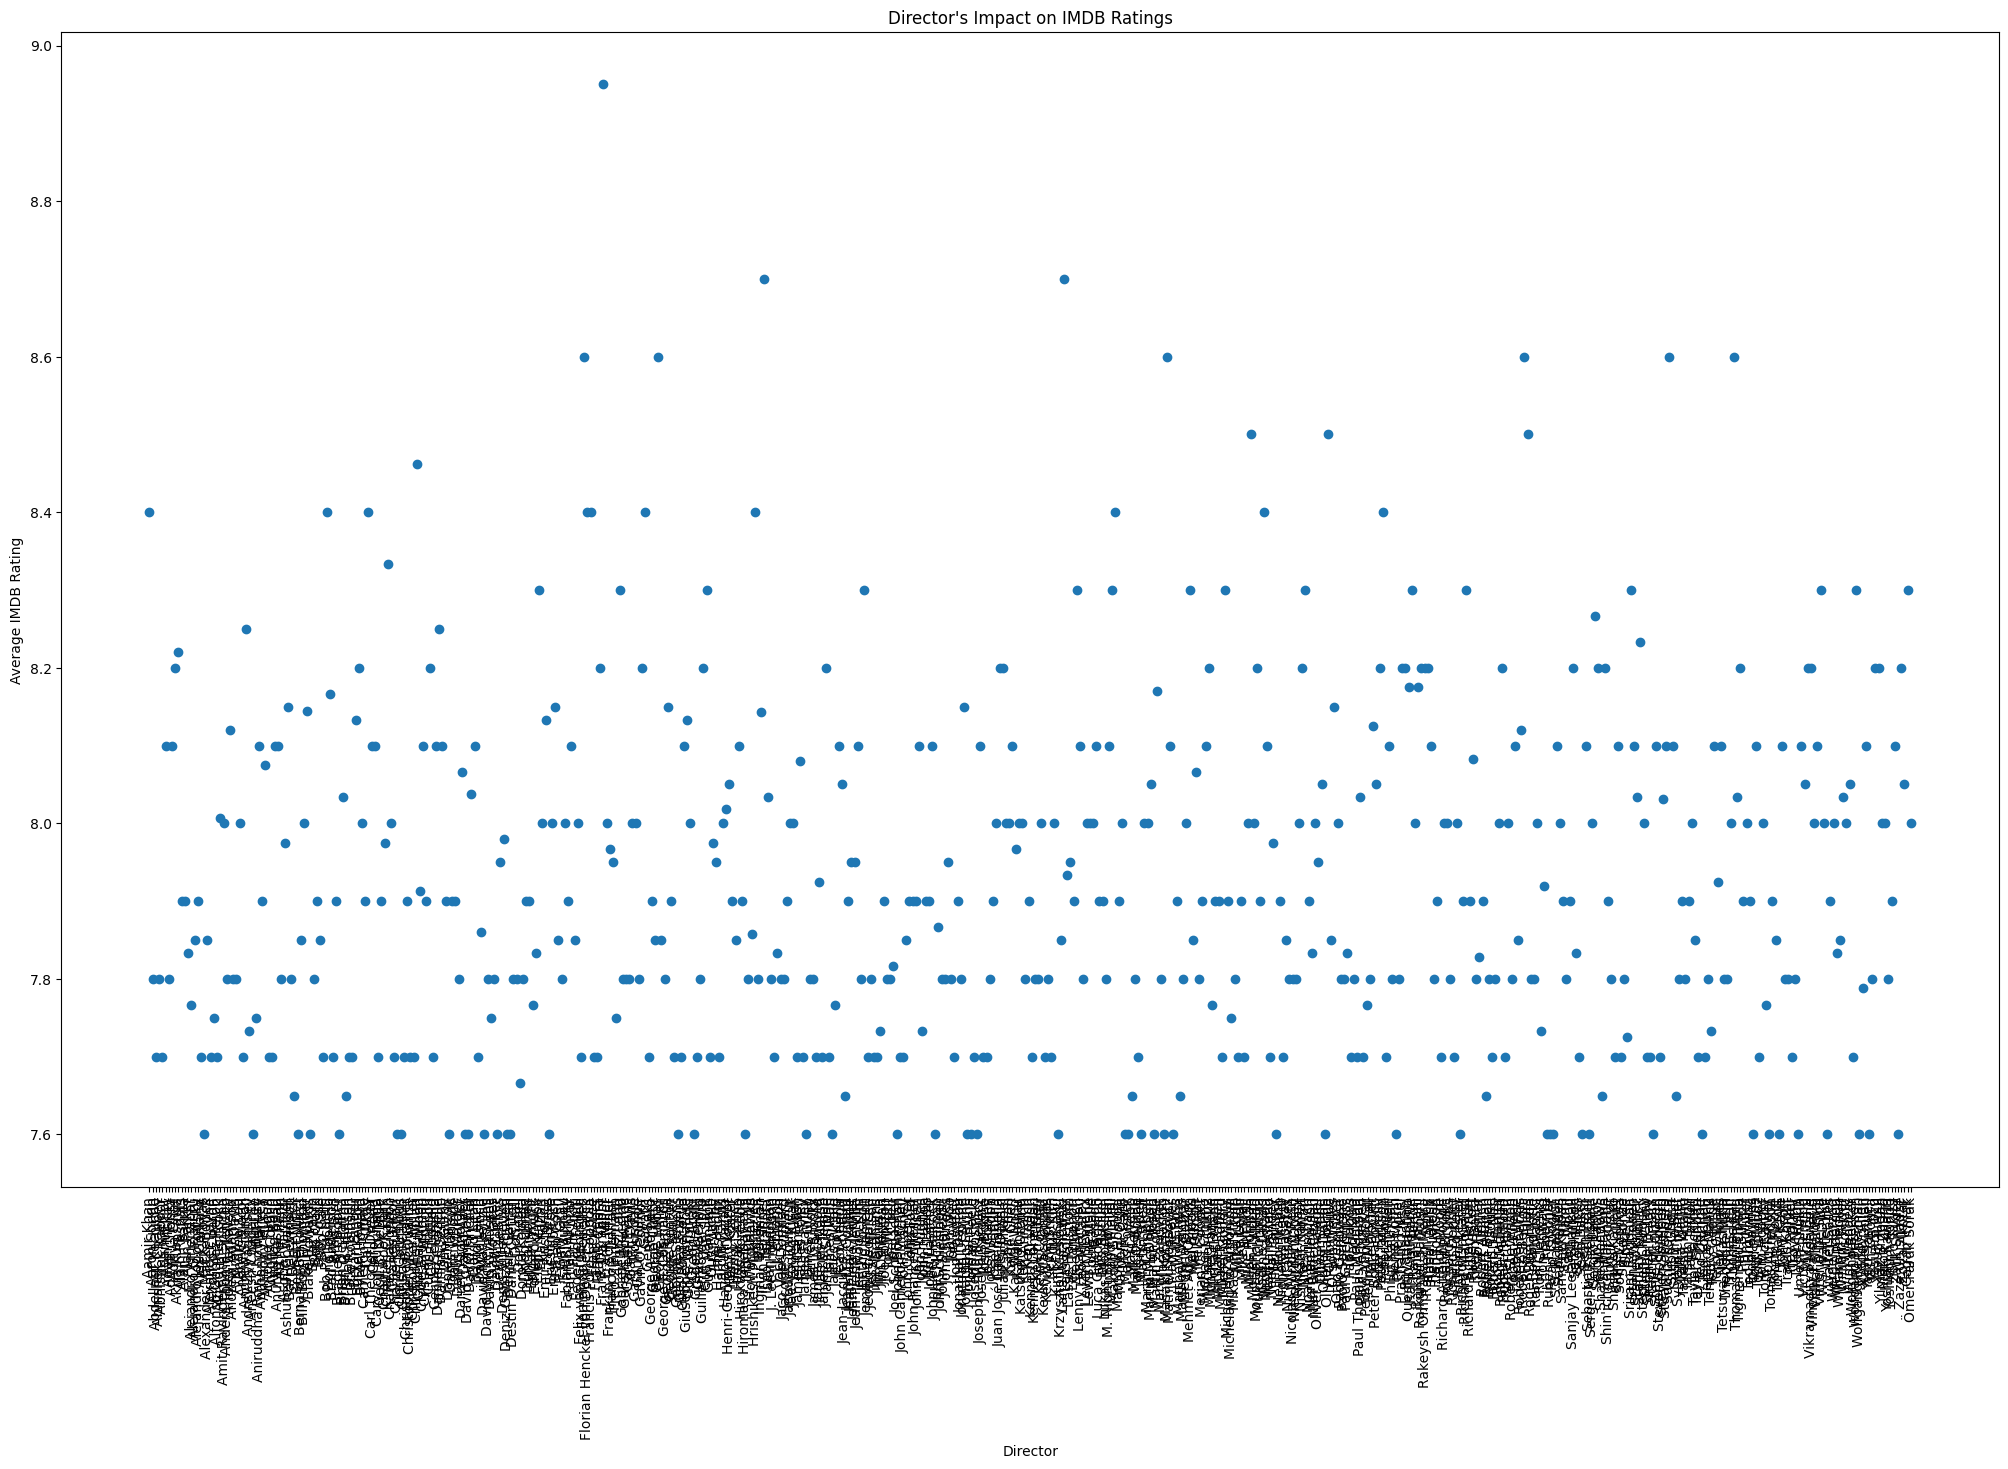

In [19]:
director_ratings = df.groupby('Director')['IMDB_Rating'].mean().reset_index()

plt.figure(figsize=(25, 15))
plt.scatter(director_ratings['Director'], director_ratings['IMDB_Rating'])
plt.title('Director\'s Impact on IMDB Ratings')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=90)
plt.show()

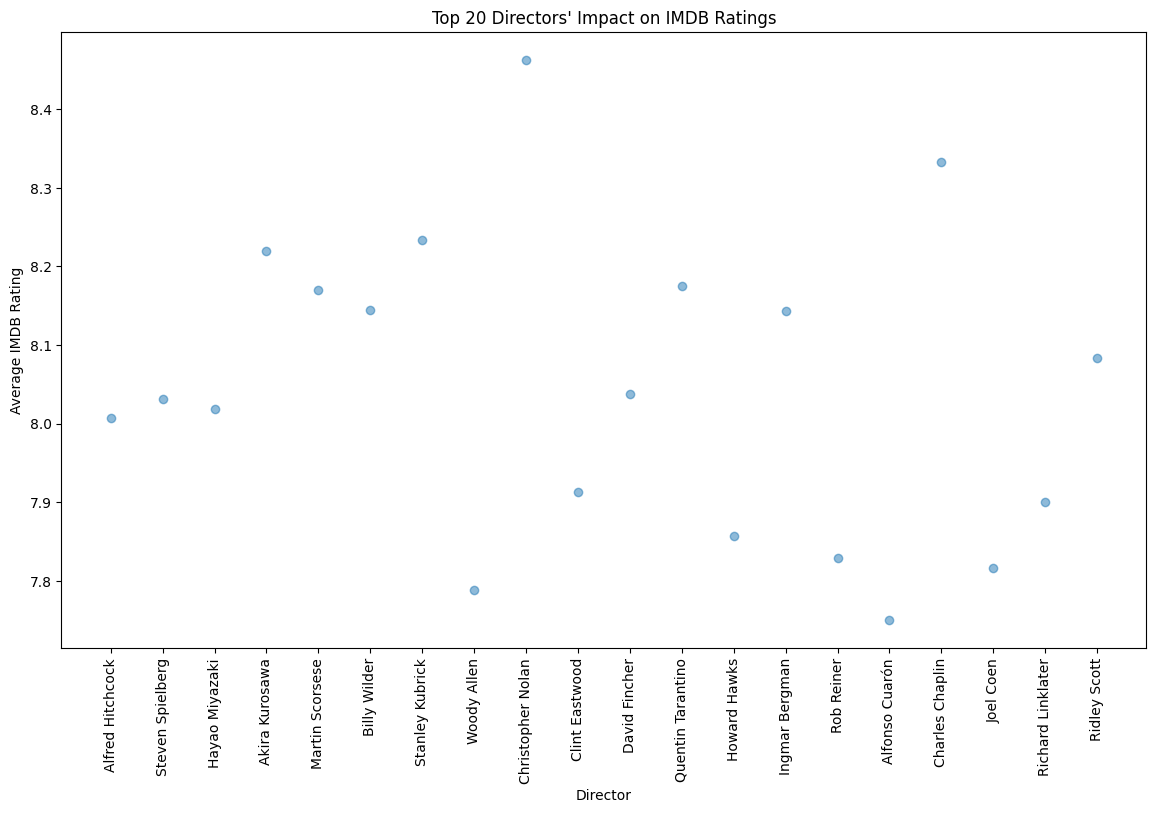

In [21]:
"""
To see all the directors is unredable, I decided to do top 20
"""

# Calculate the number of movies each director directed
director_counts = df['Director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Movie_Count']
# Merge the average ratings with the counts
director_stats = pd.merge(director_ratings, director_counts, on='Director')
# Select top 20 directors based on the number of movies they directed
top_directors = director_stats.nlargest(20, 'Movie_Count')

plt.figure(figsize=(14, 8))
plt.scatter(top_directors['Director'], top_directors['IMDB_Rating'], alpha=0.5)
plt.title('Top 20 Directors\' Impact on IMDB Ratings')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=90)
plt.show()

In [22]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


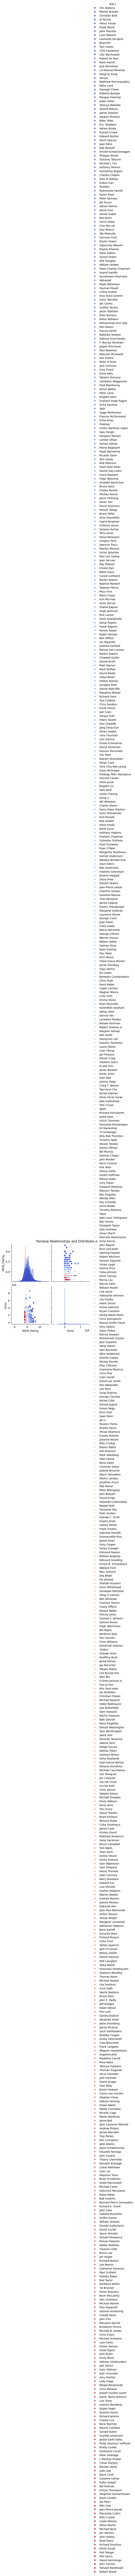

In [37]:
columns_of_interest = ['IMDB_Rating', 'Gross', 'Star1', 'Star2', 'Star3','Star4']
df_subset = df[columns_of_interest]
sns.pairplot(df_subset, hue='Star1', palette='coolwarm')
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()

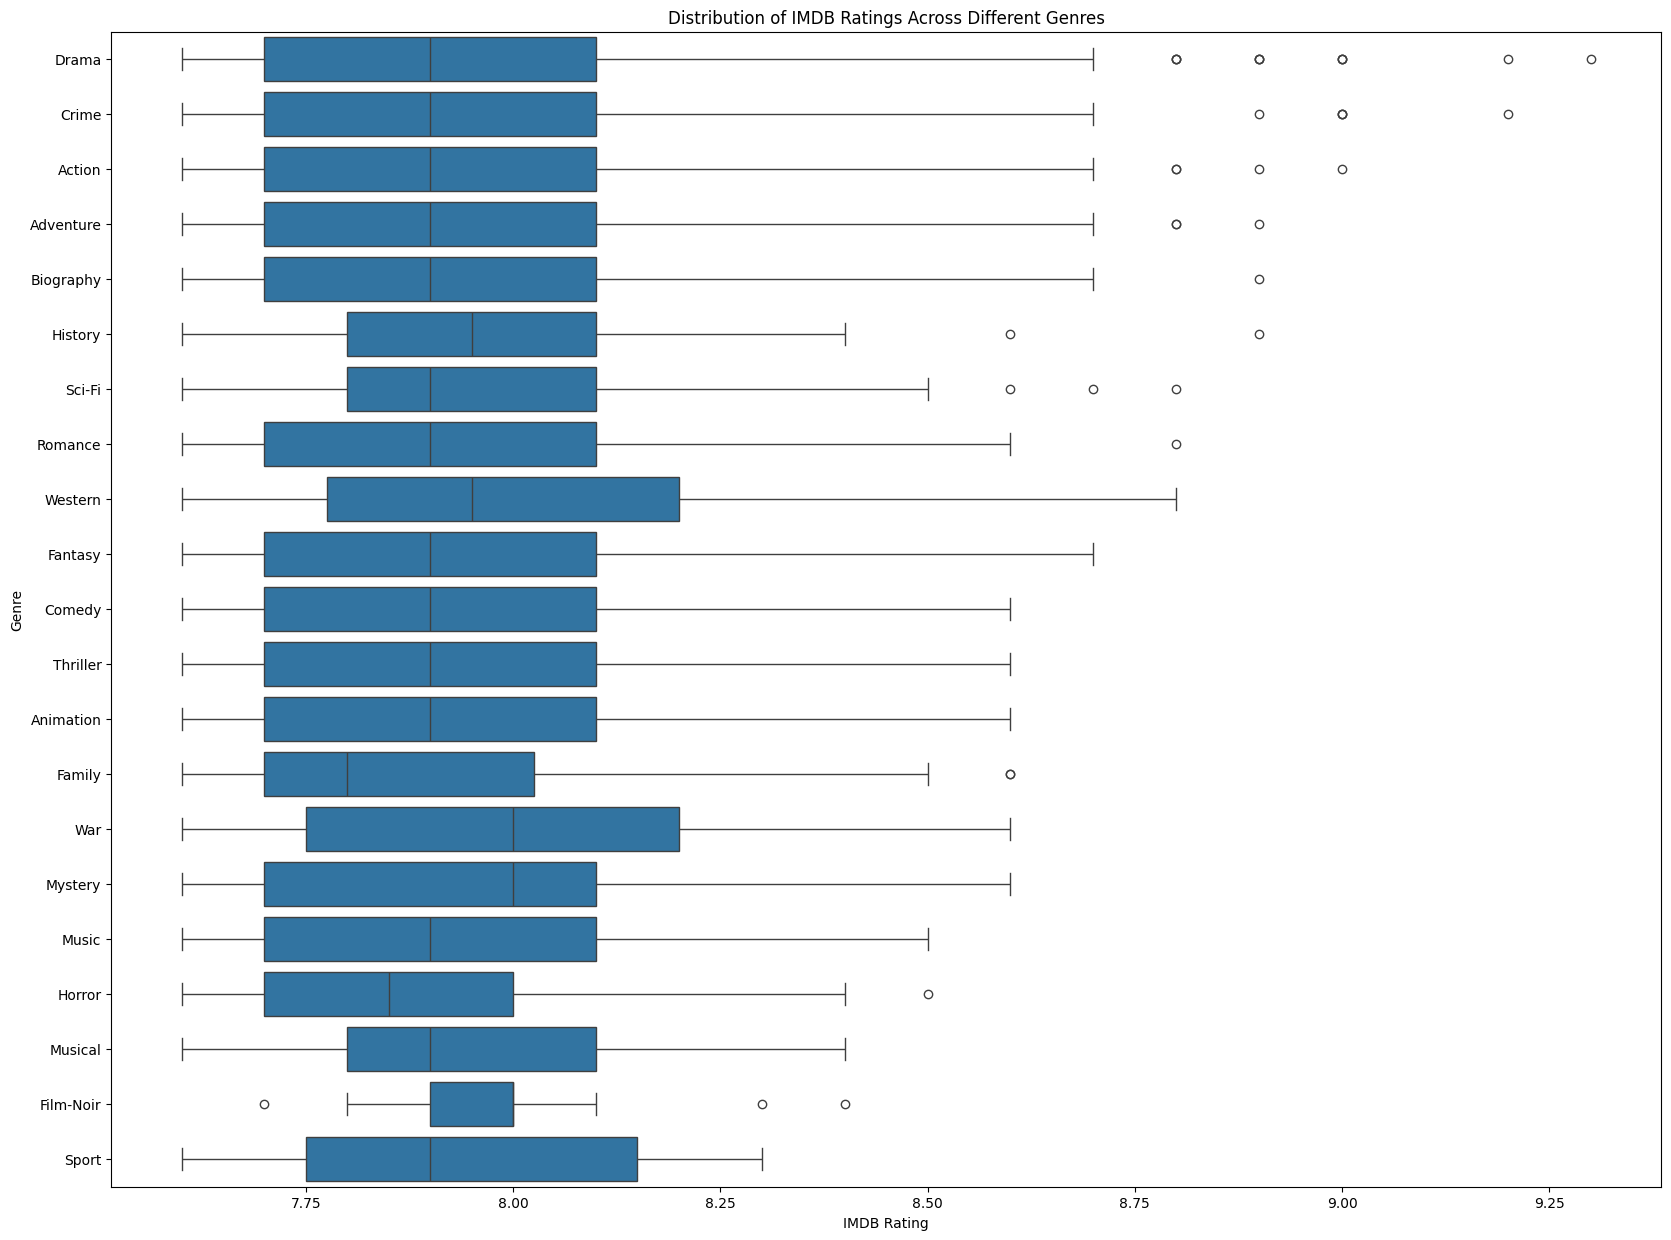

In [31]:
plt.figure(figsize=(20, 15))
sns.boxplot(x='IMDB_Rating', y=genres, data=df)
plt.title('Distribution of IMDB Ratings Across Different Genres')
plt.xlabel('IMDB Rating')
plt.ylabel('Genre')
plt.show()

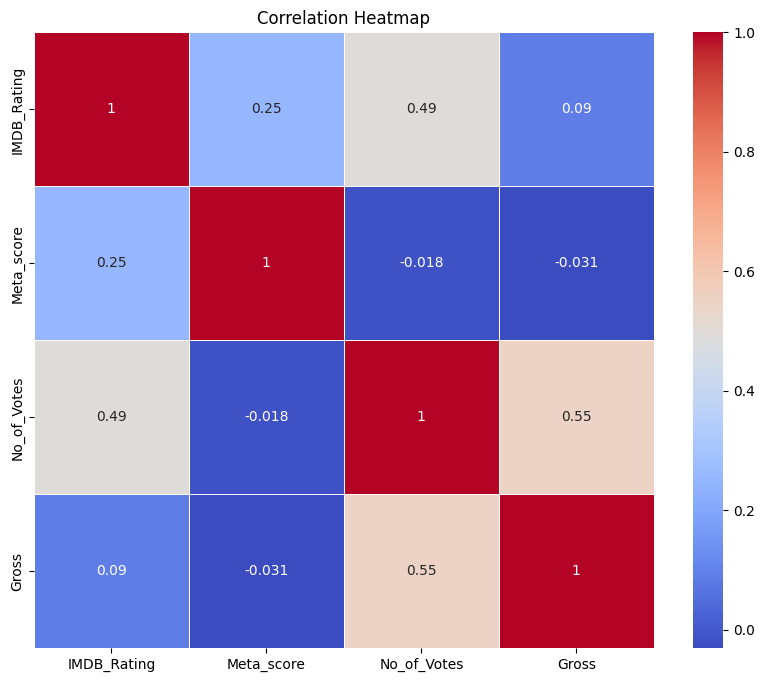

In [33]:
correlation_matrix = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()